In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
#from sklearn import linear_model
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV 

In [2]:
!pip install xgboost

You should consider upgrading via the 'c:\users\admin\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [4]:
train_df = pd.read_csv("train.csv")
train_df.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [5]:
test_df = pd.read_csv("test.csv")
test_df.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515
1,2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002
2,6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941
3,7,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,0.445276,0.518485,0.299028,0.598166
4,10,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,0.817721,0.805895,0.790591,0.249275


In [6]:
print(train_df.shape)
print(test_df.shape)

(300000, 16)
(200000, 15)


<AxesSubplot:>

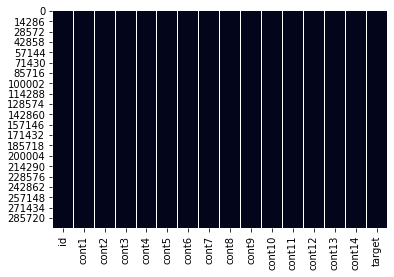

In [7]:
# The heatmap shows that it has no null or missing values
sns.heatmap(train_df.isnull(), cbar=False)

In [8]:
train_df[train_df.columns[1:]].corr()['target'][:]

cont1    -0.032994
cont2     0.067102
cont3     0.058936
cont4     0.005522
cont5    -0.005358
cont6     0.027955
cont7     0.067234
cont8     0.014698
cont9    -0.013029
cont10   -0.021143
cont11    0.050996
cont12    0.047809
cont13   -0.006642
cont14   -0.006609
target    1.000000
Name: target, dtype: float64

In [9]:
train_df.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,249825.145857,0.506873,0.497898,0.521557,0.515683,0.502022,0.526515,0.487890,0.525163,0.459857,0.520532,0.483926,0.506877,0.553442,0.503713,7.905661
std,144476.732562,0.203976,0.228159,0.200770,0.233035,0.220701,0.217909,0.181096,0.216221,0.196685,0.201854,0.220082,0.218947,0.229730,0.208238,0.733071
min,1.000000,-0.082263,-0.031397,0.020967,0.152761,0.276377,0.066166,-0.097666,0.217260,-0.240604,-0.085046,0.083277,0.088635,0.029950,0.166367,0.000000
25%,124656.500000,0.343078,0.319170,0.344096,0.294935,0.284108,0.356163,0.346600,0.341486,0.330832,0.375465,0.300474,0.310166,0.350472,0.308673,7.329367
50%,249738.500000,0.484005,0.553209,0.551471,0.482880,0.451733,0.470988,0.466825,0.483460,0.416843,0.458877,0.441916,0.486599,0.487707,0.431845,7.940571
75%,374836.250000,0.643789,0.731263,0.648315,0.748705,0.670660,0.694043,0.581292,0.685250,0.575041,0.700292,0.679128,0.694453,0.768479,0.712653,8.470084
max,499999.000000,1.016227,0.859697,1.006955,1.010402,1.034261,1.043858,1.066167,1.024427,1.004114,1.199951,1.022620,1.049025,0.977845,0.868506,10.267569


In [10]:
#Using simple linear regression
#lr = linear_model.LinearRegression()

In [11]:
X = train_df[['cont1','cont2','cont3','cont4','cont5','cont6','cont7','cont8','cont9','cont10','cont11','cont12','cont13','cont14']]
X.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411
1,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484
2,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047
3,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528
4,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772


In [12]:
Y = train_df[['target']]
Y.head()

,target
0,7.243043
1,8.203331
2,7.776091
3,6.957716
4,7.951046


In [13]:
# Commands for simple linear regression
#lr = lr.fit(X,Y)
#print(lr.score(X,Y))
#lr.coef_

In [14]:
x_test = test_df[['cont1','cont2','cont3','cont4','cont5','cont6','cont7','cont8','cont9','cont10','cont11','cont12','cont13','cont14']]
x_test.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515
1,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002
2,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941
3,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,0.445276,0.518485,0.299028,0.598166
4,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,0.817721,0.805895,0.790591,0.249275


In [15]:
# Commands for simple linear regression
#y_test = lr.predict(x_test)
#Y_target = pd.DataFrame(y_test, columns=['target'])
#Y_target.head()

In [ ]:
#Hyperparameter tuning using RandomSearchCV
#n_estimators = [100, 500, 900, 1100, 1500]
learning_rate = [0.05, 0.10, 0.15]
max_depth = [3, 4, 5, 6, 8]
min_child_weight = [1,3,5,7]
gamma = [0.0, 0.1, 0.2]
colsample_bytree = [0.3, 0.4, 0.5]
boost = ['gbtree', 'gblinear']


#'n_estimators': n_estimators,
random_grid = {
    'learning_rate': learning_rate,
    'max_depth': max_depth,
    'min_child_weight': min_child_weight,
    'gamma': gamma,
    'colsample_bytree': colsample_bytree,
    'boost': boost
}
xgbr = xgb.XGBRegressor()
xgbr_random = RandomizedSearchCV(estimator = xgbr, param_distributions = random_grid, n_iter = 50, cv = 4, verbose=2, random_state=42, n_jobs = -1)
xgbr_random.fit(X,Y)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [19]:
# Use this after you have run the Random Search atleast once
random_grid = {
    'learning_rate': [0.1],
    'max_depth': [8],
    'min_child_weight': [3],
    'gamma': [0.1],
    'colsample_bytree': [0.4],
    'boost': ['gbtree']
}
xgbr = xgb.XGBRegressor()
xgbr_random = RandomizedSearchCV(estimator = xgbr, param_distributions = random_grid, n_iter = 50, cv = 4, verbose=2, random_state=42, n_jobs = -1)
xgbr_random.fit(X,Y)

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  3.8min finished


[21:15:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boost } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=4,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                          reg_l

In [20]:
xgbr_random.best_params_
# Output of running random search optimization
# 1st Iteration
#{'min_child_weight': 3,
# 'max_depth': 8,
# 'learning_rate': 0.1,
# 'gamma': 0.1,
# 'colsample_bytree': 0.4,
# 'boost': 'gbtree'}

{'min_child_weight': 3,
 'max_depth': 8,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 0.4,
 'boost': 'gbtree'}

In [21]:
y_test = xgbr_random.predict(x_test)
Y_target = pd.DataFrame(y_test, columns=['target'])
Y_target.head()

,target
0,7.864256
1,7.862518
2,7.974619
3,8.262560
4,8.206767


In [22]:
Y_target.to_csv("submission.csv")